In [1]:
import pandas as pd 
combined_df = pd.read_csv('../dataset/combined_for_train.csv')
pd.options.display.float_format = '{:.10f}'.format


In [2]:
combined_df

,Period,Cycle_Number,velocity,experiment_number,position,displacement,smoothed_displacement
0,300.6410000000,1542,160.0000000000,2,0,0.0001970475,0.0001666170
1,600.6560000000,2777,160.0000000000,2,0,0.0001970475,0.0001686130
2,901.1560000000,4014,160.0000000000,2,0,0.0001870700,0.0001656190
3,1201.3910000000,5249,160.0000000000,2,0,0.0002045300,0.0001825800
4,1502.0000000000,6489,160.0000000000,2,0,0.0001895675,0.0001656210
...,...,...,...,...,...,...,...
4507,19228.8750000000,188595,380.0000000000,7,1,0.0002692932,0.0002421187
4508,19529.2660000000,191533,380.0000000000,7,1,0.0002890590,0.0002490364
4509,19830.2190000000,194473,380.0000000000,7,1,0.0002791773,0.0002470588
4510,20130.9690000000,197411,380.0000000000,7,1,0.0002816487,0.0002431063


In [3]:
unique_values_col4 = combined_df.iloc[:, 3].unique()

print(unique_values_col4)


[2 3 6 7]


In [4]:
unique_values_col4 = combined_df['experiment_number'].unique()

# Creating separate DataFrames for each experiment and storing them in a dictionary
experiment_tables = {exp_num: combined_df[combined_df['experiment_number'] == exp_num] for exp_num in unique_values_col4}

for exp_num, table in experiment_tables.items():
    file_name = f"Experiment_{exp_num}_Table.csv"
    table.to_csv(file_name, index=False)
    print(f"Saved {file_name}")

Saved Experiment_2_Table.csv
Saved Experiment_3_Table.csv
Saved Experiment_6_Table.csv
Saved Experiment_7_Table.csv


In [5]:
table_2 = experiment_tables[2]
table_3 = experiment_tables[3]
table_6 = experiment_tables[6]
table_7 = experiment_tables[7]

In [6]:
table_2.head()

,Period,Cycle_Number,velocity,experiment_number,position,displacement,smoothed_displacement
0,300.6410000000,1542,160.0000000000,2,0,0.0001970475,0.0001666170
1,600.6560000000,2777,160.0000000000,2,0,0.0001970475,0.0001686130
2,901.1560000000,4014,160.0000000000,2,0,0.0001870700,0.0001656190
3,1201.3910000000,5249,160.0000000000,2,0,0.0002045300,0.0001825800
4,1502.0000000000,6489,160.0000000000,2,0,0.0001895675,0.0001656210


In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Define X (features) and y (target)
X = table_2[['velocity', 'Cycle_Number']]
y = table_2['smoothed_displacement']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


Mean Squared Error: 1.1256693307371447e-09
R-squared Score: -0.00010240355086232888


In [9]:
X = table_2[['velocity', 'Cycle_Number']]
y = table_2['smoothed_displacement']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,           # Control number of trees
        max_depth=5,               # Limit depth to reduce complexity
        min_samples_split=10,       # More samples required to split a node
        min_samples_leaf=4,         # More samples required at a leaf node
        max_features='sqrt',        # Consider only sqrt(number of features) at each split
        random_state=42
    ),
    "Support Vector Regressor": SVR(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-squared Score: {r2}\n")

Linear Regression - Mean Squared Error: 4.781441393492258e-10
Linear Regression - R-squared Score: 0.5751922079161789

Random Forest - Mean Squared Error: 1.274122215171083e-10
Random Forest - R-squared Score: 0.8868004435213932

Support Vector Regressor - Mean Squared Error: 2.9521697398434828e-09
Support Vector Regressor - R-squared Score: -1.6228591042576994

Neural Network - Mean Squared Error: 10.19855631429214
Neural Network - R-squared Score: -9060920825.538984



In [11]:
def train(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

In [12]:
model_forest_constraint = RandomForestRegressor(
    n_estimators=100,           # Control number of trees
    max_depth=10,               # Limit depth to reduce complexity
    min_samples_split=10,       # More samples required to split a node
    min_samples_leaf=4,         # More samples required at a leaf node
    max_features='sqrt',        # Consider only sqrt(number of features) at each split
    random_state=42
)


train(model_forest_constraint)

(1.2060201874965406e-10, 0.8928509771642877)

In [13]:
# 4507	28/06/2005 18:14:50	19228.875	0	188595	1	14	1	1	380.0	7	1	0.000269	0.000242
# Example: predicting the displacement for a new set of velocity and Cycle_Number values
new_data = pd.DataFrame({
    'velocity': [160.0],
    'Cycle_Number': [6489]
})

# Predict the displacement
predicted_displacement = model_forest_constraint.predict(new_data)

# Display the predicted displacement
print(f"Predicted Displacement: {predicted_displacement[0]}")


Predicted Displacement: 0.000185292248574205


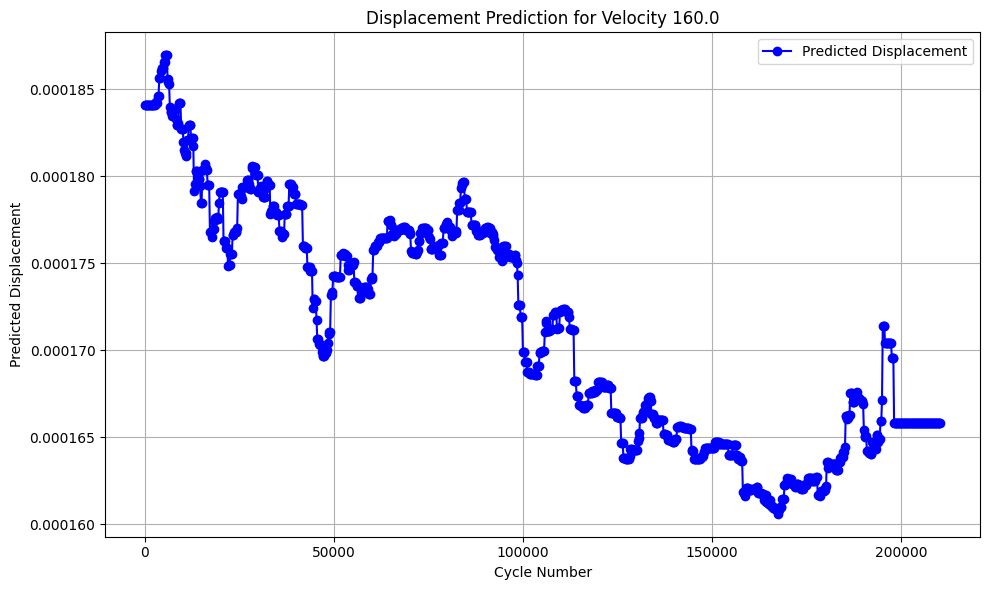

In [14]:
import matplotlib.pyplot as plt

def generate_and_plot_displacement(model, start_cycle, end_cycle, step_size, velocity, ):
    cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
    new_data = pd.DataFrame({
        'velocity': [velocity] * len(cycle_numbers),
        'Cycle_Number': cycle_numbers
    })

    predicted_displacement = model.predict(new_data)

    plt.figure(figsize=(10, 6))
    plt.plot(cycle_numbers, predicted_displacement, label='Predicted Displacement', color='blue', marker='o')
    plt.xlabel('Cycle Number')
    plt.ylabel('Predicted Displacement')
    plt.title(f'Displacement Prediction for Velocity {velocity}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage of the function 199473
generate_and_plot_displacement(model_forest_constraint, start_cycle=0, end_cycle=210473, step_size=200, velocity=160.0)


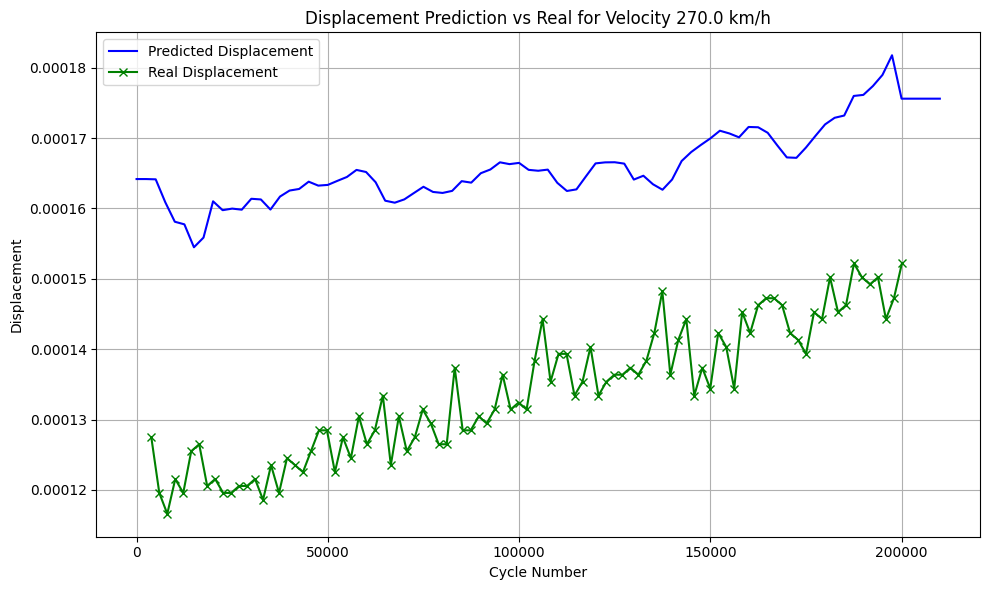

In [47]:
import matplotlib.pyplot as plt

def generate_and_plot_displacement(model, ground_truth_df, start_cycle, end_cycle, step_size, velocity):
    # Generate cycle numbers for the prediction
    cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
    new_data = pd.DataFrame({
        'velocity': [velocity] * len(cycle_numbers),
        'Cycle_Number': cycle_numbers
    })

    # Predict displacement
    predicted_displacement = model.predict(new_data)

    # Filter ground truth data for the specified cycle range and velocity
    ground_truth_filtered = ground_truth_df[
        (ground_truth_df['Cycle_Number'].between(start_cycle, end_cycle)) &
        (ground_truth_df['velocity'] == velocity)
    ]
    
    # Plot predicted displacement
    plt.figure(figsize=(10, 6))
    plt.plot(cycle_numbers, predicted_displacement, label='Predicted Displacement', color='blue', marker='')
    
    # Plot real displacement (ground truth)
    plt.plot(ground_truth_filtered['Cycle_Number'], ground_truth_filtered['smoothed_displacement'], 
             label='Real Displacement', color='green', marker='x')
    
    # Plot settings
    plt.xlabel('Cycle Number')
    plt.ylabel('Displacement')
    plt.title(f'Displacement Prediction vs Real for Velocity {velocity} km/h')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage of the function
generate_and_plot_displacement(model_forest_constraint, table_7[table_7['position'] == 1], start_cycle=0, end_cycle=210473, step_size=2500, velocity=270.0)


To improve your evaluation approach and reduce overfitting for non-linear regression, you can take these steps:

    1. Use a Validation Dataset for Early Stopping: Implement a validation set to monitor the model's performance and stop training early if the validation error stops improving. This helps prevent overfitting by avoiding excessive training on the training data.

    2. Alternative Evaluation Metrics: Instead of using Mean Squared Error (MSE) and R², consider metrics better suited for non-linear regression:

        - Mean Absolute Error (MAE): This metric measures the average magnitude of errors in the predictions, making it more interpretable and less sensitive to outliers.
        - Root Mean Squared Logarithmic Error (RMSLE): Useful if your target variable spans several orders of magnitude, as it penalizes large prediction errors differently than standard RMSE.
        - Mean Absolute Percentage Error (MAPE): Suitable for measuring the relative accuracy of predictions when dealing with data on different scales.
    3. K-Fold Cross-Validation: Instead of a simple train/test split, you can use K-fold cross-validation to better estimate the model's performance across different subsets of the data. This involves training the model multiple times on different partitions and averaging the results.

In [16]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
import numpy as np

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def train_with_cross_validation(model, X, y, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    mae_scores = []
    rmsle_scores = []
    
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
        
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        
        # Evaluate the model
        mae = mean_absolute_error(y_val_fold, y_pred)
        rmsle = np.sqrt(mean_squared_log_error(y_val_fold, y_pred))
        
        mae_scores.append(mae)
        rmsle_scores.append(rmsle)
    
    # Calculate average scores
    avg_mae = np.mean(mae_scores)
    avg_rmsle = np.mean(rmsle_scores)
    
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        print(f'Predicted Range: {y_pred.min()} - {y_pred.max()}')
        print(f'Actual Range: {y_val_fold.min()} - {y_val_fold.max()}')


    return avg_mae, avg_rmsle

# Train the model using K-Fold Cross-Validation
avg_mae, avg_rmsle = train_with_cross_validation(model_forest_constraint, X, y)

print(f'Average MAE: {avg_mae:.4f}')
print(f'Average RMSLE: {avg_rmsle:.4f}')


Predicted Range: 0.00015469373140547331 - 0.000271117998709061
Actual Range: 0.000145268 - 0.0002983109999999
Predicted Range: 0.00015911627787092695 - 0.00026757678037302456
Actual Range: 0.0001506539999999 - 0.000305362
Predicted Range: 0.0001559764849914197 - 0.00027229058718550547
Actual Range: 0.000145664 - 0.0002833469999999
Predicted Range: 0.00015595118036364523 - 0.0002705125645230452
Actual Range: 0.0001472449999999 - 0.000279357
Predicted Range: 0.00015683854729675562 - 0.0002669395902962889
Actual Range: 0.000147659 - 0.000317272
Average MAE: 0.0000
Average RMSLE: 0.0000


In [17]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, median_absolute_error
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_with_metrics(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate various metrics
    mae_score = mean_absolute_error(y_test, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
    msle_score = mean_squared_log_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    
    # Print the scores
    print(f'Mean Absolute Error (MAE): {mae_score:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse_score:.4f}')
    print(f'Mean Squared Logarithmic Error (MSLE): {msle_score:.4f}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape_score:.4f}')
    print(f'Median Absolute Error: {median_ae:.4f}')

# Train the model and evaluate using the specified metrics
train_with_metrics(model_forest_constraint, X_train, X_test, y_train, y_test)


Mean Absolute Error (MAE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Squared Logarithmic Error (MSLE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.0499
Median Absolute Error: 0.0000


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom scoring function that you aim to maximize
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the model and hyperparameters to tune
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predict on the validation set
y_pred_val = best_model.predict(X_val)

# Calculate the custom score
validation_score = custom_scorer(y_val, y_pred_val)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score: {validation_score:.4f}")

# Optional: Refit the best model on the entire dataset
best_model.fit(X, y)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
189 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\U

Best Model Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 150}
Validation Score: 1.0000


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                      n_estimators=150, random_state=42)

In [19]:
# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Test MAE: {test_mae:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


Test MAE: 0.0000
Test RMSE: 0.0000


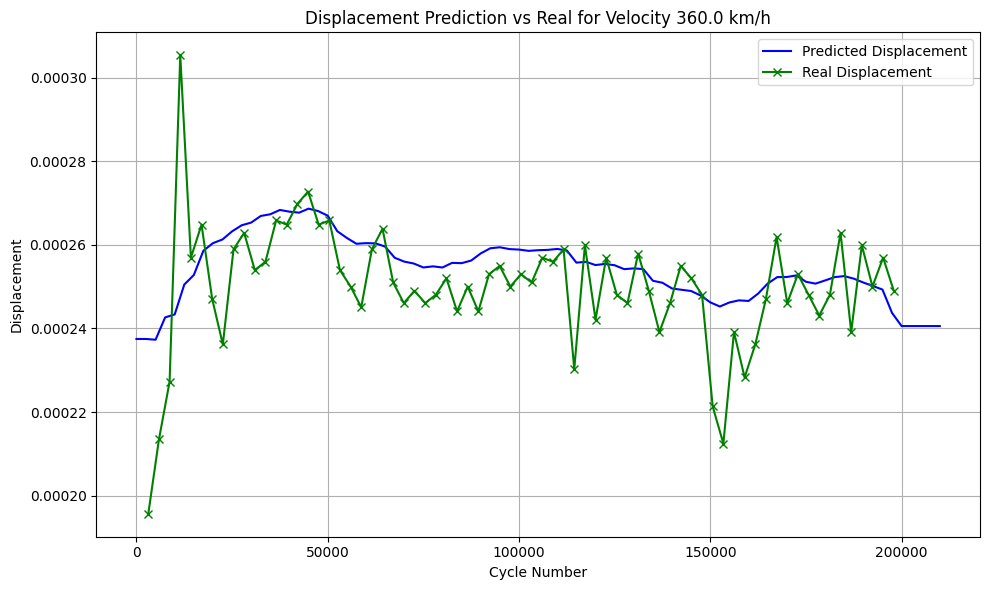

In [20]:
generate_and_plot_displacement(best_model, table_2[table_2['position'] == 1], start_cycle=0, end_cycle=210473, step_size=2500, velocity=360.0)


In [21]:
import pandas as pd

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
std_dev = np.std(y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Algorithm': ['Random Forest (optimized)'],
    'R2': [r2],  
    'σ': [std_dev],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse]
})

# Display the results
results_df


,Algorithm,R2,σ,RMSE,MAE,MSE
0,Random Forest (optimized),0.9140746662,0.0000302209,0.0000098343,0.0000081258,0.0000000001


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

models = {
    'Multivariable Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'SVM': SVR()
}

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
std_dev = np.std(y_test_pred)
r2 = r2_score(y_test, y_test_pred)


results = {
    'Algorithm': ['Random Forest (optimized)'],
    'R2': [r2],  
    'σ': [std_dev],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse]
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)  # R2 score
    std_dev = np.std(y_pred)
    
    # Store the results
    results['Algorithm'].append(name)
    results['R2'].append(r2)
    results['σ'].append(std_dev)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['MSE'].append(mse)

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Set display options to show numbers in standard decimal format
pd.options.display.float_format = '{:.4f}'.format

# Display the results DataFrame
results_df



,Algorithm,R2,σ,RMSE,MAE,MSE
0,Random Forest (optimized),0.9141,0.0000,0.0000,0.0000,0.0000
1,Multivariable Regression,0.5752,0.0000,0.0000,0.0000,0.0000
2,Decision Tree,0.7604,0.0000,0.0000,0.0000,0.0000
3,Neural Network,-9060920825.5390,2.9718,3.1935,2.2758,10.1986
4,SVM,-1.6229,0.0000,0.0001,0.0001,0.0000


# Average Experiments

In [23]:
table_2 = experiment_tables[2]
table_3 = experiment_tables[3]
table_6 = experiment_tables[6]
table_7 = experiment_tables[7]

In [24]:
table_2 = table_2.reset_index(drop=True)
table_3 = table_3.reset_index(drop=True)  
table_6 = table_6.reset_index(drop=True)
table_7 = table_7.reset_index(drop=True)

In [25]:
table_2

,Period,Cycle_Number,velocity,experiment_number,position,displacement,smoothed_displacement
0,300.6410,1542,160.0000,2,0,0.0002,0.0002
1,600.6560,2777,160.0000,2,0,0.0002,0.0002
2,901.1560,4014,160.0000,2,0,0.0002,0.0002
3,1201.3910,5249,160.0000,2,0,0.0002,0.0002
4,1502.0000,6489,160.0000,2,0,0.0002,0.0002
...,...,...,...,...,...,...,...
1055,20136.7960,186833,360.0000,2,1,0.0003,0.0002
1056,20436.8280,189610,360.0000,2,1,0.0003,0.0003
1057,20736.9210,192388,360.0000,2,1,0.0003,0.0003
1058,21037.4530,195175,360.0000,2,1,0.0003,0.0003


In [26]:
table_3

,Period,Cycle_Number,velocity,experiment_number,position,displacement,smoothed_displacement
0,300.8280,1972,160.0000,3,0,0.0002,0.0002
1,601.5620,3211,160.0000,3,0,0.0002,0.0002
2,902.2340,4449,160.0000,3,0,0.0002,0.0002
3,1202.8120,5687,160.0000,3,0,0.0002,0.0002
4,1503.0460,6921,160.0000,3,0,0.0002,0.0002
...,...,...,...,...,...,...,...
1055,20131.7030,186786,360.0000,3,1,0.0003,0.0003
1056,20432.3910,189571,360.0000,3,1,0.0003,0.0003
1057,20732.4850,192351,360.0000,3,1,0.0003,0.0003
1058,21032.9220,195135,360.0000,3,1,0.0003,0.0003


In [27]:
table_6["smoothed_displacement"]

0      0.0002
1      0.0002
2      0.0002
3      0.0002
4      0.0002
        ...  
1191   0.0002
1192   0.0002
1193   0.0002
1194   0.0002
1195   0.0002
Name: smoothed_displacement, Length: 1196, dtype: float64

In [28]:
# Set pandas to display the full precision for floating-point numbers
pd.options.display.float_format = '{:.10f}'.format

# Display the DataFrame to see the full values
table_7


,Period,Cycle_Number,velocity,experiment_number,position,displacement,smoothed_displacement
0,300.4690000000,1764,160.0000000000,7,0,0.0001820825,0.0001596320
1,600.6100000000,2998,160.0000000000,7,0,0.0001820825,0.0001666160
2,900.8280000000,4236,160.0000000000,7,0,0.0001870700,0.0001676170
3,1201.0000000000,5468,160.0000000000,7,0,0.0001770950,0.0001596340
4,1502.1880000000,6708,160.0000000000,7,0,0.0001770925,0.0001636230
...,...,...,...,...,...,...,...
1191,19228.8750000000,188595,380.0000000000,7,1,0.0002692932,0.0002421187
1192,19529.2660000000,191533,380.0000000000,7,1,0.0002890590,0.0002490364
1193,19830.2190000000,194473,380.0000000000,7,1,0.0002791773,0.0002470588
1194,20130.9690000000,197411,380.0000000000,7,1,0.0002816487,0.0002431063


In [29]:
import pandas as pd


table_2['id'] = range(len(table_2))
table_3['id'] = range(len(table_3))
table_6['id'] = range(len(table_6))
table_7['id'] = range(len(table_7))

combined_df = pd.concat([table_2, table_3, table_6, table_7])

final_df = combined_df.groupby(['id', 'velocity']).mean().reset_index()

final_df

,id,velocity,Period,Cycle_Number,experiment_number,position,displacement,smoothed_displacement
0,0,160.0000000000,300.6565000000,1772.2500000000,4.5000000000,0.0000000000,0.0002026587,0.0001768433
1,1,160.0000000000,601.1132500000,3009.7500000000,4.5000000000,0.0000000000,0.0001957994,0.0001721037
2,2,160.0000000000,901.6522500000,4246.7500000000,4.5000000000,0.0000000000,0.0001926831,0.0001711072
3,3,160.0000000000,1202.1407500000,5483.5000000000,4.5000000000,0.0000000000,0.0001951756,0.0001731017
4,4,160.0000000000,1502.7577500000,6721.0000000000,4.5000000000,0.0000000000,0.0001933062,0.0001726035
...,...,...,...,...,...,...,...,...
1191,1191,380.0000000000,19230.4140000000,188809.5000000000,6.5000000000,1.0000000000,0.0002322341,0.0002050583
1192,1192,380.0000000000,19530.9140000000,191746.0000000000,6.5000000000,1.0000000000,0.0002421170,0.0002080247
1193,1193,380.0000000000,19831.5235000000,194684.5000000000,6.5000000000,1.0000000000,0.0002371774,0.0002070364
1194,1194,380.0000000000,20132.3435000000,197626.0000000000,6.5000000000,1.0000000000,0.0002384119,0.0002050576


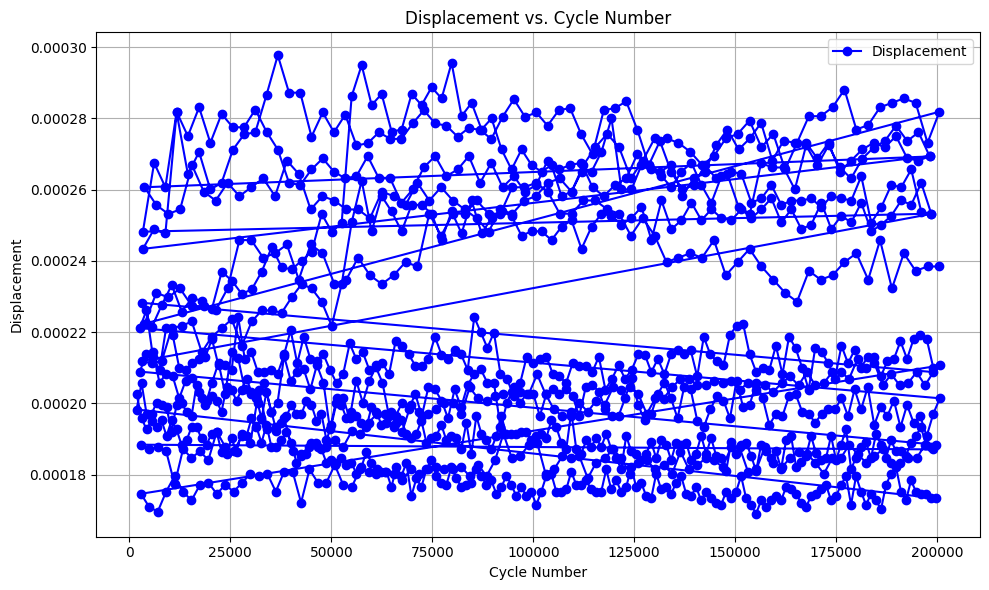

In [30]:
import matplotlib.pyplot as plt

# Plot displacement vs. Cycle_Number
plt.figure(figsize=(10, 6))
plt.plot(final_df['Cycle_Number'], final_df['displacement'], label='Displacement', color='blue', marker='o')

# Labeling the plot
plt.xlabel('Cycle Number')
plt.ylabel('Displacement')
plt.title('Displacement vs. Cycle Number')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [31]:
X = final_df[['velocity', 'Cycle_Number']]
y = final_df['smoothed_displacement']

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# This gives a final split of 60% train, 20% validation, and 20% test

def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the model and hyperparameters to tune
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters
grid_search.fit(X_train, y_train)
best_model_average = grid_search.best_estimator_

# Predict on the validation set
y_pred_val = best_model_average.predict(X_val)

# Calculate the custom score
validation_score = custom_scorer(y_val, y_pred_val)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score: {validation_score:.4f}")

# Optional: Refit the best model on the entire dataset
best_model_average.fit(X, y)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\U

Best Model Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 150}
Validation Score: 1.0000


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                      n_estimators=150, random_state=42)

# R2 score

In [32]:
from sklearn.metrics import r2_score

y_pred_val = best_model_average.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model_average.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')


R2 Score on Validation Set: 0.9367
R2 Score on Test Set: 0.9291


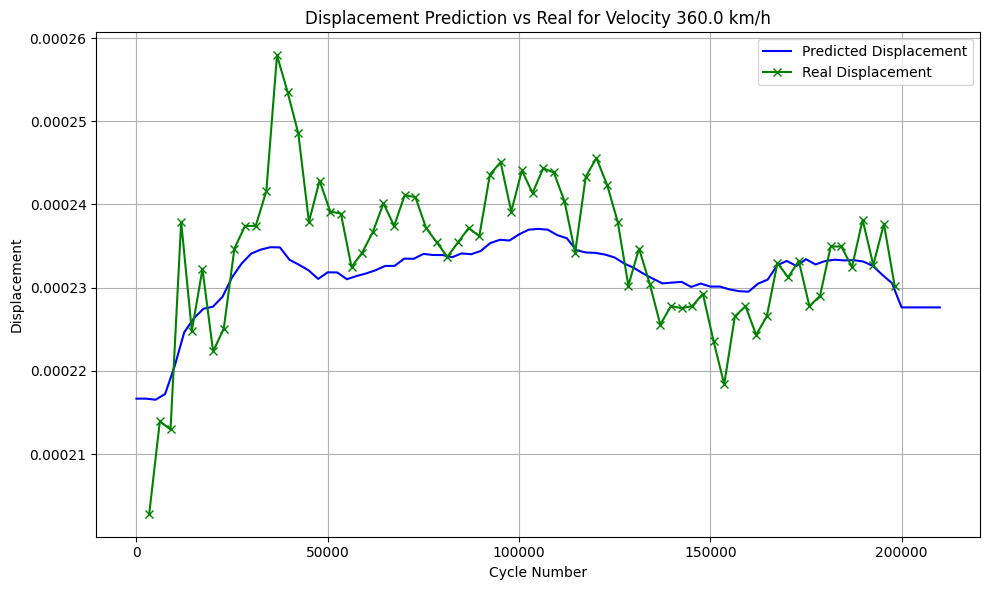

In [33]:
generate_and_plot_displacement(best_model_average, final_df[final_df['position'] == 1], start_cycle=0, end_cycle=210473, step_size=2500, velocity=360.0)

In [34]:
from sklearn.metrics import r2_score

y_pred_test = best_model_average.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Test Set: {r2_test:.4f}')


R2 Score on Test Set: 0.9291


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

models = {
    'Multivariable Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'SVM': SVR()
}

# Evaluate the best model on the test set
y_test_pred = best_model_average.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
std_dev = np.std(y_test_pred)
r2 = r2_score(y_test, y_test_pred)


results = {
    'Algorithm': ['Random Forest (optimized)'],
    'R2': [r2],  
    'σ': [std_dev],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse]
}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)  # R2 score
    std_dev = np.std(y_pred)
    
    results['Algorithm'].append(name)
    results['R2'].append(r2)
    results['σ'].append(std_dev)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['MSE'].append(mse)

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Set display options to show numbers in standard decimal format
pd.options.display.float_format = '{:.4f}'.format

# Display the results DataFrame
results_df



,Algorithm,R2,σ,RMSE,MAE,MSE
0,Random Forest (optimized),0.9291,0.0000,0.0000,0.0000,0.0000
1,Multivariable Regression,0.6966,0.0000,0.0000,0.0000,0.0000
2,Decision Tree,0.8252,0.0000,0.0000,0.0000,0.0000
3,Neural Network,-14879318648.5424,3.8879,3.9379,2.5332,15.5073
4,SVM,-0.3184,0.0000,0.0000,0.0000,0.0000


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the validation set
y_pred_val = best_model_average.predict(X_val)

# Calculate various metrics
mae = mean_absolute_error(y_val, y_pred_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mse = mean_squared_error(y_val, y_pred_val)

# Print the scores
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Optionally, calculate the R2 score for reference
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred_val)
print(f'R2 Score: {r2:.4f}')


Mean Absolute Error (MAE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Squared Error (MSE): 0.0000
R2 Score: 0.9367


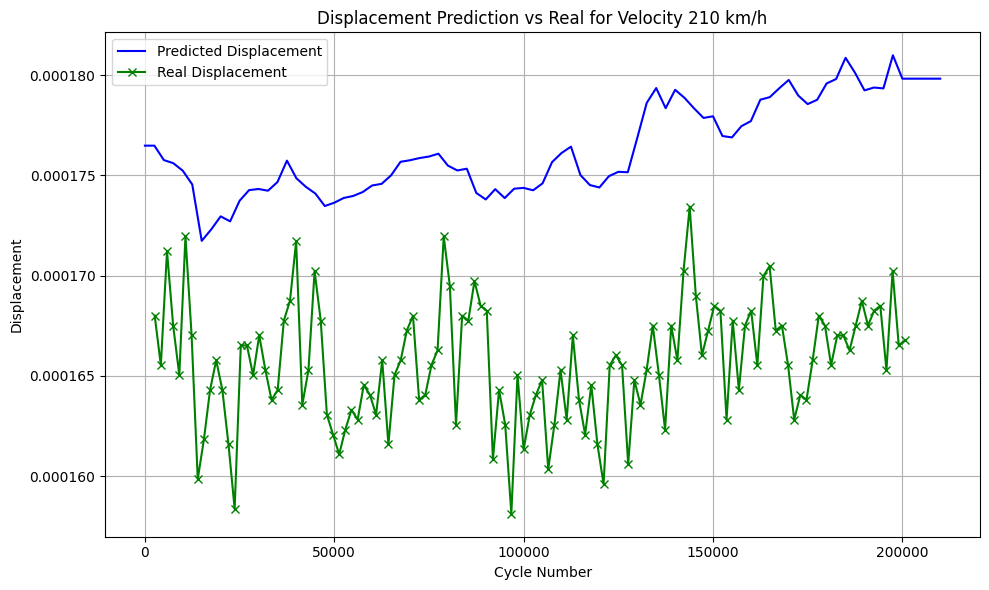

In [37]:
generate_and_plot_displacement(best_model, final_df[final_df['position'] == 1], start_cycle=0, end_cycle=210473, step_size=2500, velocity=210)

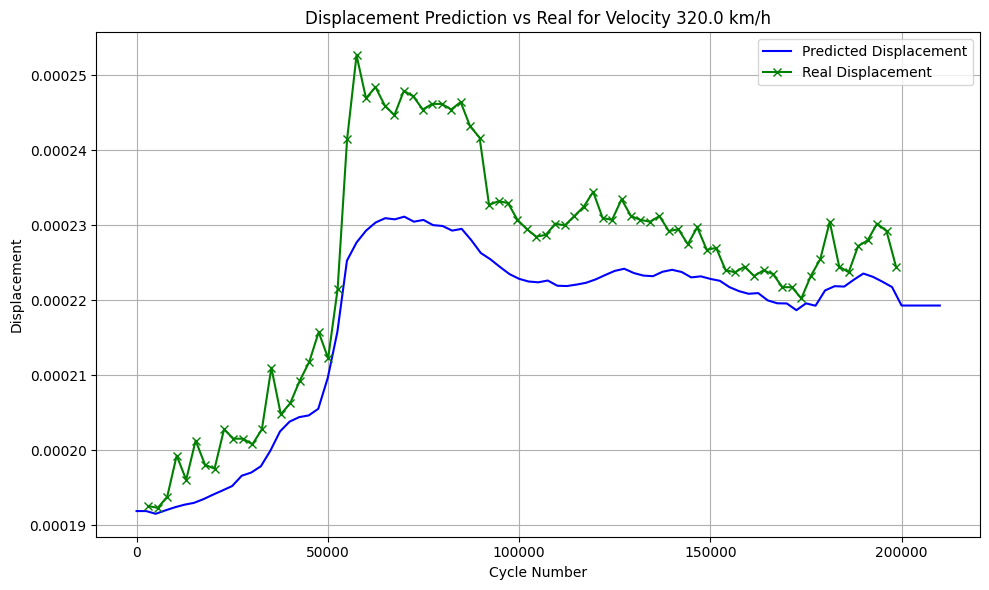

In [38]:
generate_and_plot_displacement(best_model_average, final_df[final_df['position'] == 0], start_cycle=0, end_cycle=210473, step_size=2500, velocity=320.0)

In [39]:
final_df

,id,velocity,Period,Cycle_Number,experiment_number,position,displacement,smoothed_displacement
0,0,160.0000,300.6565,1772.2500,4.5000,0.0000,0.0002,0.0002
1,1,160.0000,601.1132,3009.7500,4.5000,0.0000,0.0002,0.0002
2,2,160.0000,901.6522,4246.7500,4.5000,0.0000,0.0002,0.0002
3,3,160.0000,1202.1408,5483.5000,4.5000,0.0000,0.0002,0.0002
4,4,160.0000,1502.7577,6721.0000,4.5000,0.0000,0.0002,0.0002
...,...,...,...,...,...,...,...,...
1191,1191,380.0000,19230.4140,188809.5000,6.5000,1.0000,0.0002,0.0002
1192,1192,380.0000,19530.9140,191746.0000,6.5000,1.0000,0.0002,0.0002
1193,1193,380.0000,19831.5235,194684.5000,6.5000,1.0000,0.0002,0.0002
1194,1194,380.0000,20132.3435,197626.0000,6.5000,1.0000,0.0002,0.0002


In [40]:
best_model

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                      n_estimators=150, random_state=42)

In [ ]:
final_df['smoothed_displacement'] *= 1000

# Convert 'Cycle_Number' and 'velocity' to integers
final_df['Cycle_Number'] = final_df['Cycle_Number'].astype(int)
final_df['velocity'] = final_df['velocity'].astype(int)

final_df


,id,velocity,Period,Cycle_Number,experiment_number,position,displacement,smoothed_displacement
0,0,160,300.6565,1772,4.5000,0.0000,0.0002,0.1768
1,1,160,601.1132,3009,4.5000,0.0000,0.0002,0.1721
2,2,160,901.6522,4246,4.5000,0.0000,0.0002,0.1711
3,3,160,1202.1408,5483,4.5000,0.0000,0.0002,0.1731
4,4,160,1502.7577,6721,4.5000,0.0000,0.0002,0.1726
...,...,...,...,...,...,...,...,...
1191,1191,380,19230.4140,188809,6.5000,1.0000,0.0002,0.2051
1192,1192,380,19530.9140,191746,6.5000,1.0000,0.0002,0.2080
1193,1193,380,19831.5235,194684,6.5000,1.0000,0.0002,0.2070
1194,1194,380,20132.3435,197626,6.5000,1.0000,0.0002,0.2051


In [42]:
X = final_df[['velocity', 'Cycle_Number']]
y = final_df['smoothed_displacement']

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# This gives a final split of 60% train, 20% validation, and 20% test

def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the model and hyperparameters to tune
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters
grid_search.fit(X_train, y_train)
best_model_average = grid_search.best_estimator_

# Predict on the validation set
y_pred_val = best_model_average.predict(X_val)

# Calculate the custom score
validation_score = custom_scorer(y_val, y_pred_val)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score: {validation_score:.4f}")

# Optional: Refit the best model on the entire dataset
best_model_average.fit(X, y)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
201 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\U

Best Model Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 150}
Validation Score: 0.9924


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                      n_estimators=150, random_state=42)

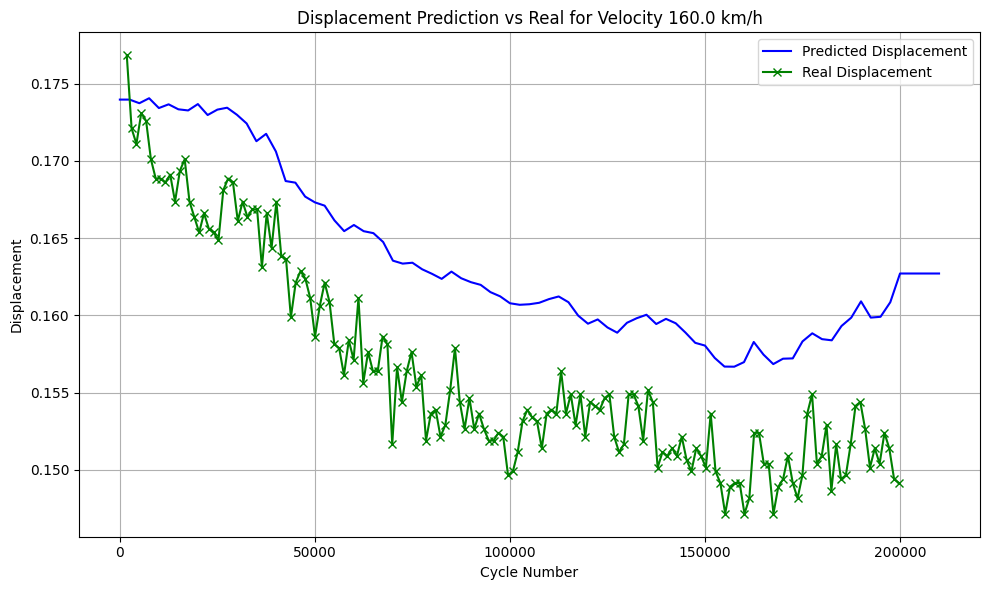

In [44]:
generate_and_plot_displacement(best_model_average, final_df[final_df['position'] == 0], start_cycle=0, end_cycle=210473, step_size=2500, velocity=160.0)

In [45]:
from sklearn.metrics import r2_score

y_pred_val = best_model_average.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model_average.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')


R2 Score on Validation Set: 0.9368
R2 Score on Test Set: 0.9290


In [43]:
import pickle

# Save the model to a file
with open('../result_data/models/RandomForestRegressor.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [48]:
# Load the model from the file
with open('../result_data/models/RandomForestRegressor.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [49]:
loaded_model

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                      n_estimators=150, random_state=42)